In [1]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

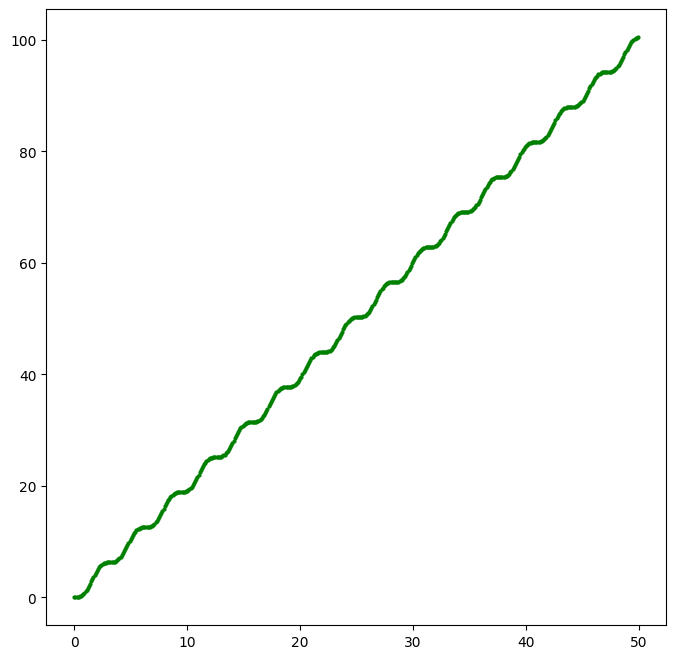

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from torchviz import make_dot

x_train = np.arange(0.0, 50.0, 0.1)
y_train = 2* x_train - np.sin(x_train*2)
# y_train = x_train - 1

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=4, label='Original data')
plt.show()


In [31]:
from micrograd.micrograd.engine import Value
weight1 = Value(0.2, label='weight1')
weight2 = Value(0.7, label='weight2')
weightbias = Value(0.5, label='weightbias')
bias = 1
learning_rate = 0.001
input1 = Value(1.0, label='input1')
input2 = Value(1.0, label='input2')



In [32]:

import random

weights = []
maxiter = 100000
lx = len(x_train)
for ite in range(maxiter) :

    i = ite % lx
    input1.data = x_train[i]
    neuron = ((input1 * weight1)  +(input2 * weight2)  + (bias * weightbias))
    result = neuron.tanh()
    expected = y_train[i]
    loss = (expected - result) ** 2


    # print("i", i)
    # print("input1", input1.data)
    # print("input2", input2.data)
    # print("expected", expected)
    # print("result", result)
    # print("loss", loss)

    loss.backward()

    # print("weight1", weight1)
    # print("weight2", weight2)
    # print("bias", weightbias)

    weights.append([weight1.data, weight2.data, weightbias.data, loss.data ])

    weight1.data += learning_rate * weight1.grad
    weight2.data += learning_rate * weight2.grad
    weightbias.data += learning_rate * weightbias.grad

    # print("after : weight1", weight1.data)
    # print("after : weight2", weight2.data)
    # print("after : bias", weightbias.data)
    # print("----")
    # zero grad
    for node in trace(loss)[0]:
        node.grad = 0.0


In [33]:
import numpy as np

nweights = np.array(weights)
# nweights2 = np.reshape(nweights, (3, -1), order='F')
nweights2 = np.stack(nweights, axis=1)
nweights

array([[ 2.00000000e-01,  7.00000000e-01,  5.00000000e-01,
         6.94980004e-01],
       [ 2.00000000e-01,  7.00508563e-01,  5.00508563e-01,
         7.03289011e-01],
       [ 2.00049391e-01,  7.01002474e-01,  5.01002474e-01,
         6.97972689e-01],
       ...,
       [-1.72307308e+00, -6.42522352e-01, -8.42522352e-01,
         1.02626673e+04],
       [-1.72307308e+00, -6.42522352e-01, -8.42522352e-01,
         1.02824054e+04],
       [-1.72307308e+00, -6.42522352e-01, -8.42522352e-01,
         1.02956715e+04]])

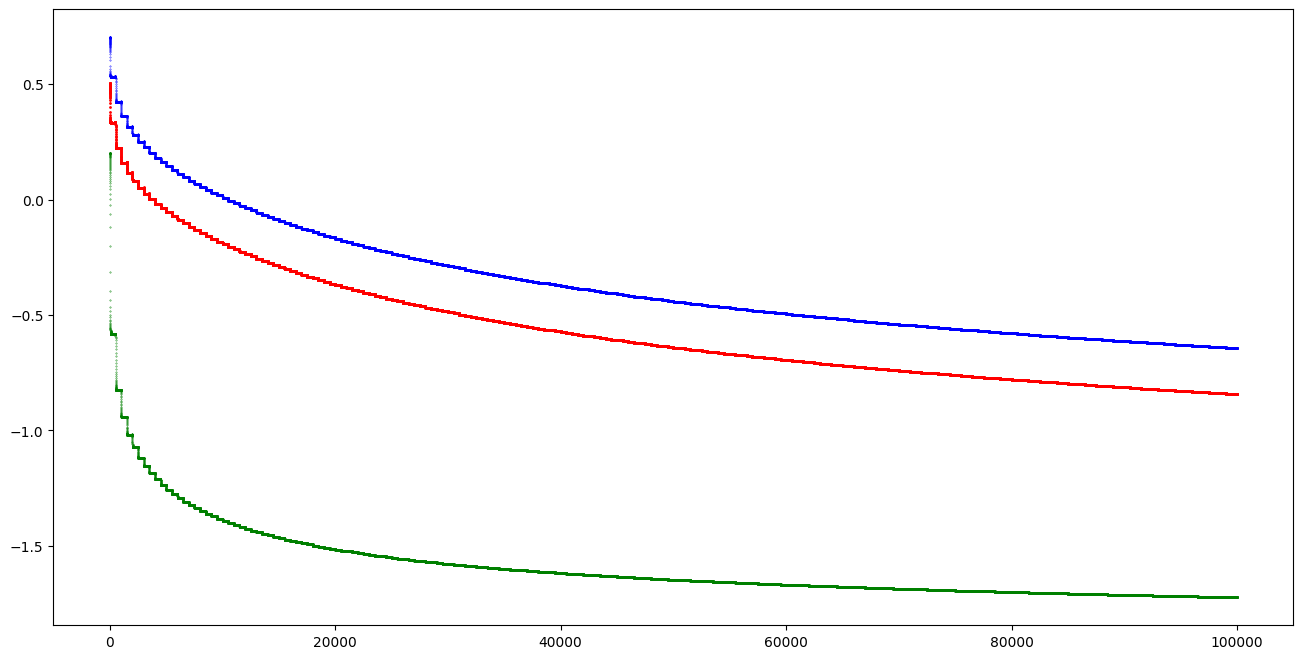

In [34]:

plt.figure(figsize=(16, 8))
plt.scatter(range(maxiter), nweights2[0], c='green', s=0.1, label='weight1')
plt.scatter(range(maxiter), nweights2[1], c='blue', s=0.1, label='weight2')
plt.scatter(range(maxiter), nweights2[2], c='red', s=1, label='b ias')
# plt.scatter(range(maxiter), nweights2[3], c='purple', s=1, label='loss')
plt.show()




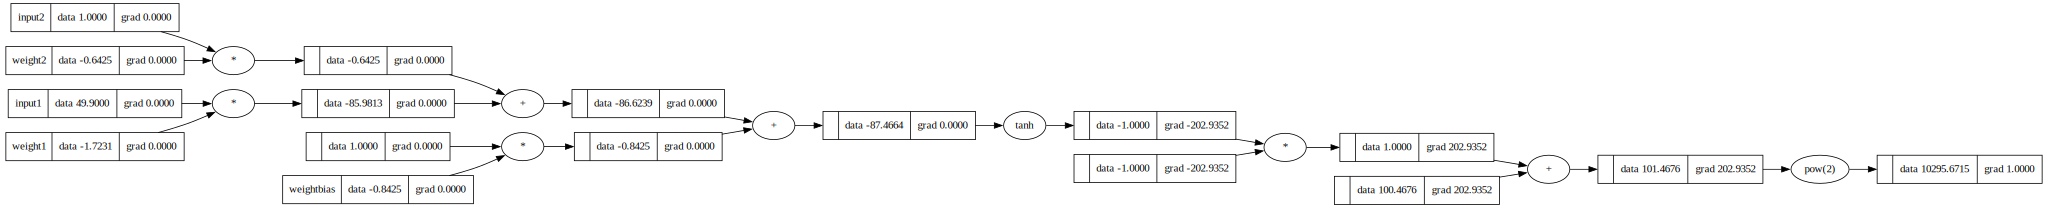

In [35]:
loss.backward()
draw_dot(loss)



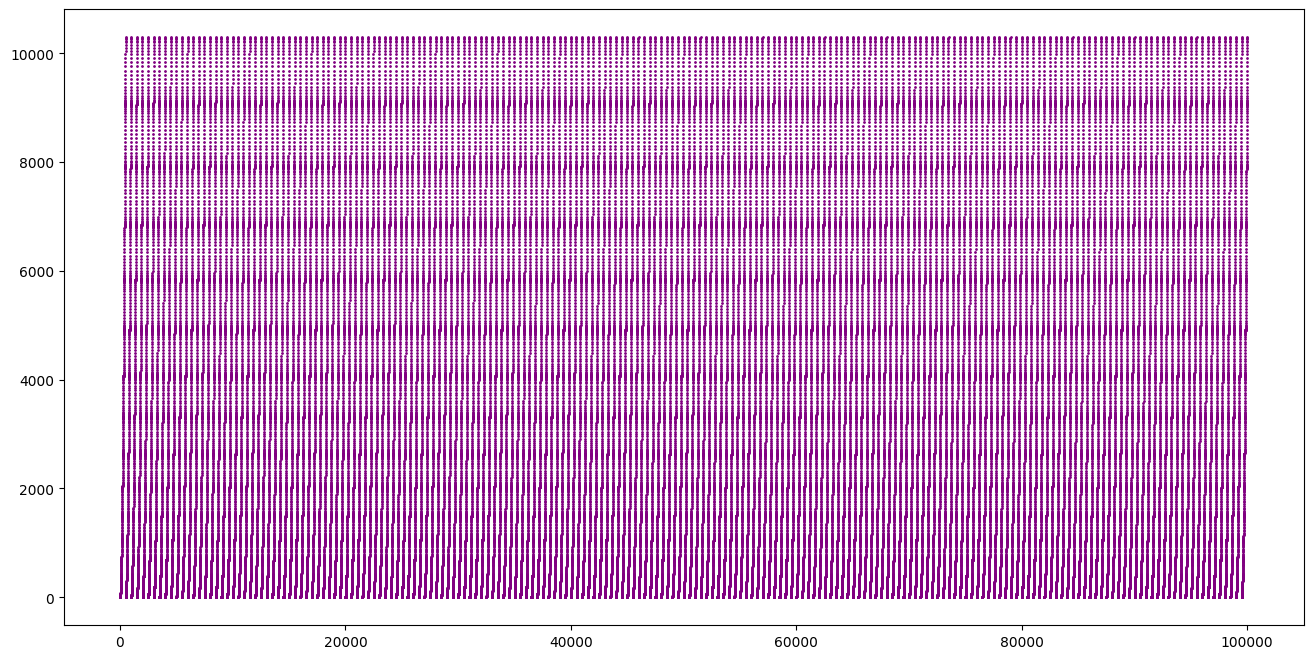

In [36]:

plt.figure(figsize=(16, 8))
plt.scatter(range(maxiter), nweights2[3], c='purple', s=1, label='loss')
plt.show()
